# Neural Networks

In [43]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
import seaborn as sns
import pandas as pd

import sys
sys.path.insert(1,'C:\\Users\\dylan.velo\\OneDrive - Softtek\\Documents\\Machine Learning')
import plots

from sklearn.datasets import make_blobs, load_breast_cancer, make_moons
from sklearn.metrics import euclidean_distances
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.utils import Bunch

Las redes neuronales son un tipo de modelo de aprendizaje automático inspirado en el funcionamiento del cerebro humano. Estas redes consisten en nodos (neuronas) organizados en capas: capa de entrada, capas ocultas y capa de salida. Cada nodo en una capa está conectado a nodos en la capa siguiente, y estas conexiones tienen pesos que se ajustan durante el proceso de entrenamiento para mejorar la precisión del modelo.

Los **perceptrones multicapa** (MLP, por sus siglas en inglés) son una generalización de los modelos lineales que pasan por diferentes etapas de procesamiento para tomar una decisión.

Un modelo lineal se basa en una función de suma ponderada (weighted sum), que puede representarse gráficamente de la siguiente manera:

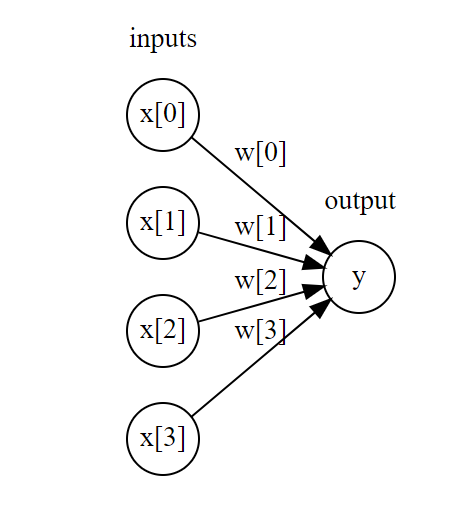

En este gráfico, cada nodo a la izquierda representa una característica (feature) que ingresa a nuestro modelo. Cada línea entre los nodos representa los coeficientes aprendidos durante el entrenamiento, y el nodo a la derecha representa la salida (output) del modelo. Básicamente, esta salida es la suma ponderada de las entradas, donde cada entrada se multiplica por su peso correspondiente.

En una red neuronal, el proceso de calcular la suma ponderada se repite múltiples veces a través de varias capas. Primero, se calculan las sumas ponderadas en las capas ocultas que se encuentran en el medio del proceso. Estos valores se combinan de nuevo en la siguiente capa para volver a calcular las sumas ponderadas, hasta llegar a una salida final.

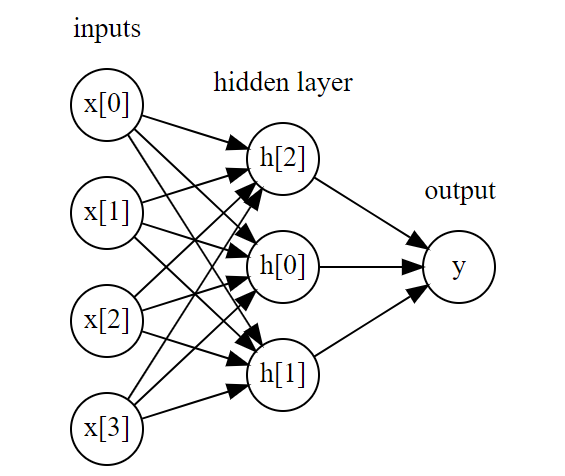

La redes neuronales pueden ser ran complejas como se desee, se pueden incluir diferente cntidad de nodos por capa, o incluir mas capas:

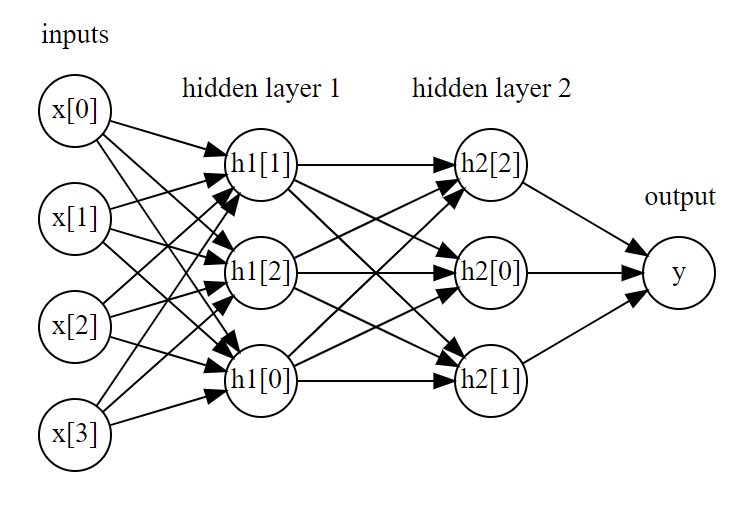

Text(0, 0.5, 'relu(x), tanh(x)')

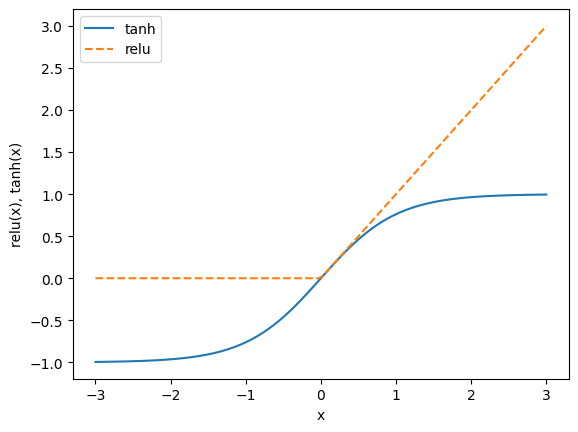

In [3]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), '--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Al aplicar el modelo MLPClassifier, por default utiliza 100 nodos en una capa oculta:

Text(0, 0.5, 'Feature 1')

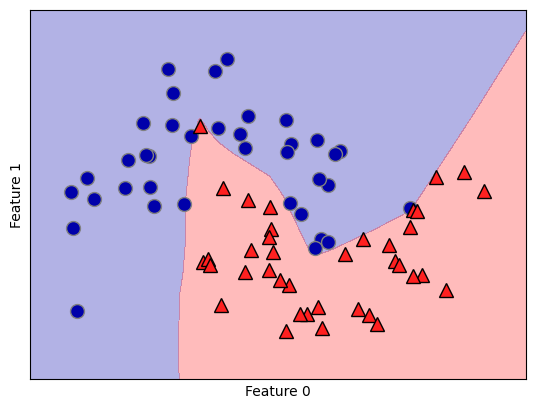

In [44]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plots.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

El numero de nodos se puede controlar con el parametro hidden_layer_sizes, para poder reducir la complejidad del modelo:

Text(0, 0.5, 'Feature 1')

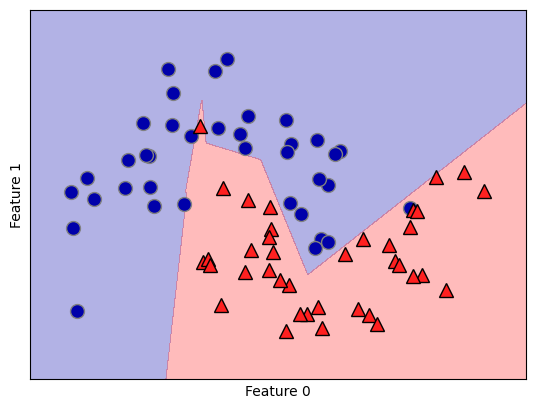

In [45]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_iter=1000).fit(X_train, y_train)
plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plots.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

La funcion no linear por default es relu, por lo que con solo una capa oculta nos esta diciendo que se generan 10 segmentos de lineas rectas. Si quisieramos que las divisiones fueras mas suave podriamos agregar mas capas o usar tanh:

Text(0, 0.5, 'Feature 1')

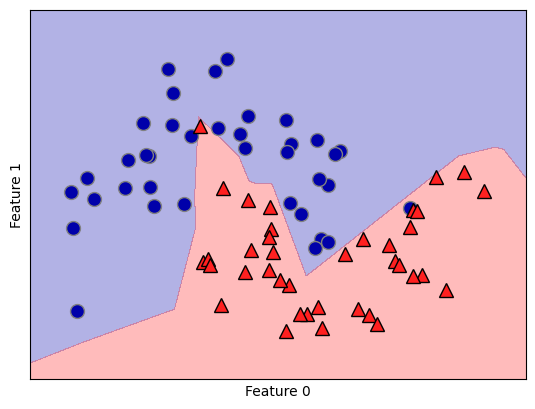

In [46]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plots.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

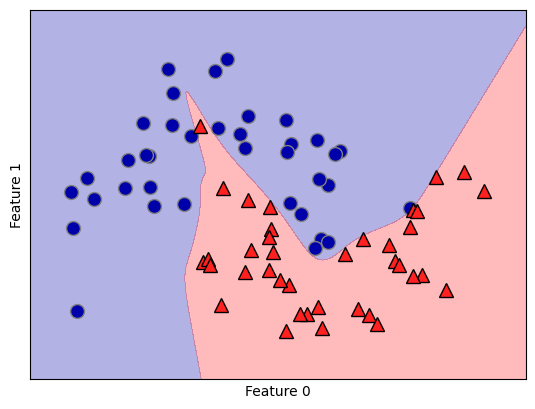

In [47]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, max_iter=1000, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
plots.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Podemos controlar la complejidad del modelo utilizando alguna penalizacion como un l2, el parametro para las penalizaciones es alpha y por default esta como un valor muy bajo, es decir poca regularizacion. a continuacion podemos ver elefecto de la regularizacion con diferentes combinaciones:

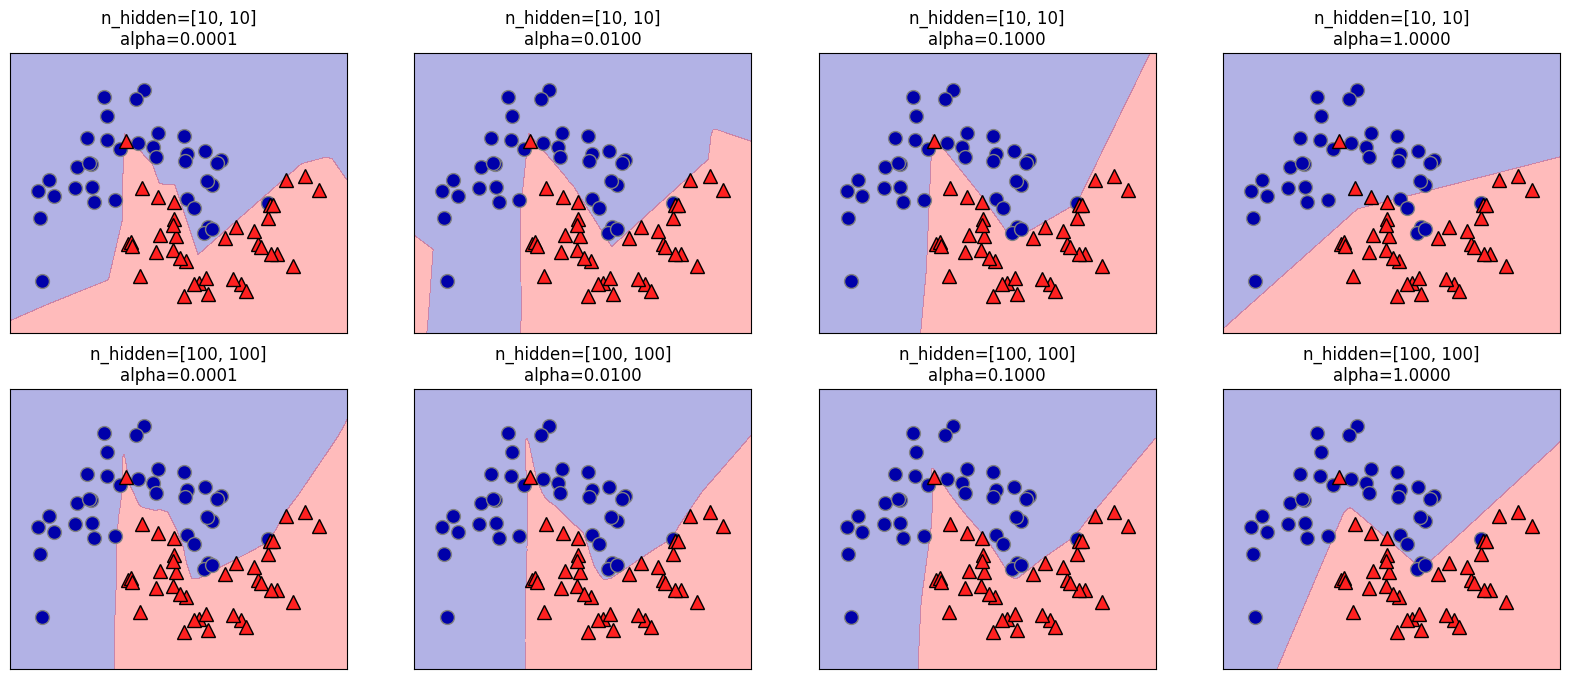

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        plots.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

Una propiedad importante es que los pesos son asignados aleatoriamente antes de que el aprendizaje comience lo que puede afectar el modelo con diferentes random seed asignados:

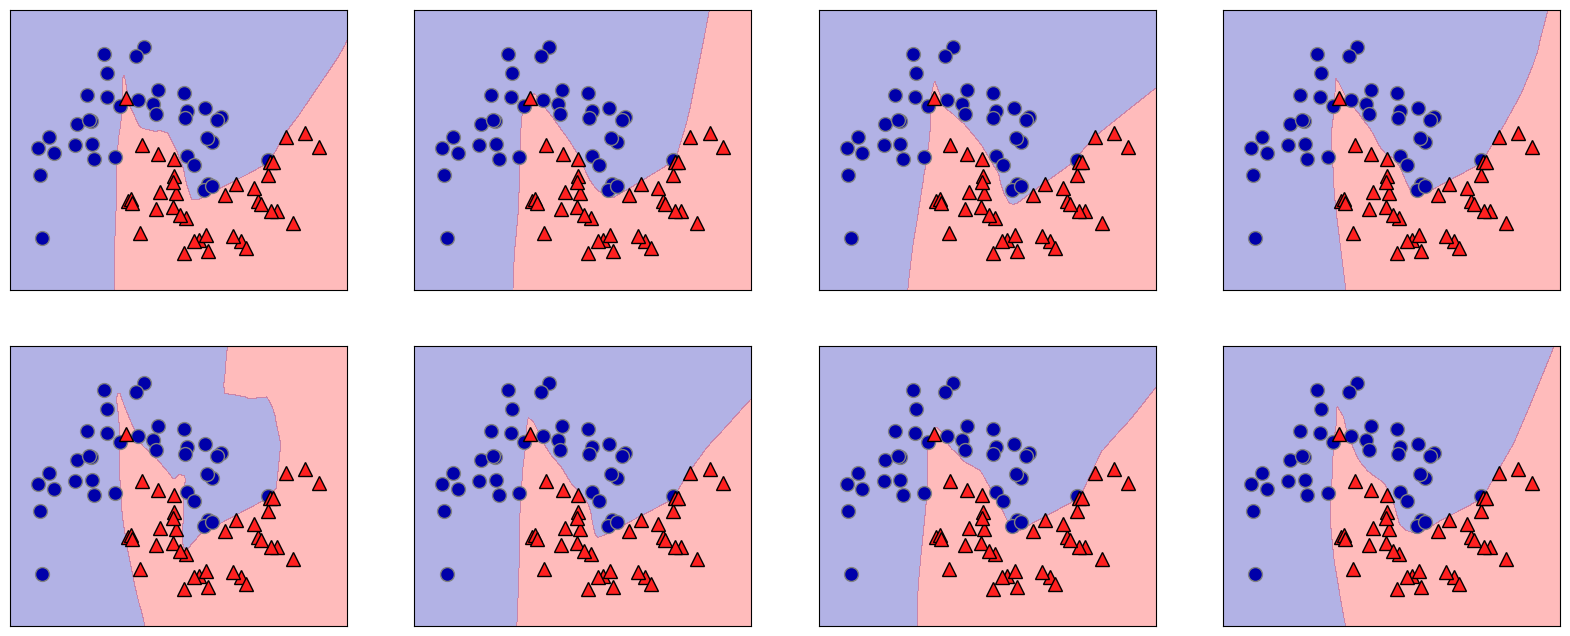

In [49]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    plots.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

### Real Example

In [21]:
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


Las redes neuronales tambien esperan que todos sus valores se encuentren un rango similar para poder funcionar eficeintemente, lo ideal es tener un promedio de 0 y una varianza de 1. Debemos re escalar nuestros datos para cumplir con el requerimiento:

In [23]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


c:\Users\dylan.velo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Incrementar el las maximas iteraciones puede ayudar a incrementar la puntuacion en el entreamiento pero no en la generalizacion:

In [24]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Ya que existe un 1 en el accuracy del training set hay que buscar bajar la complejidad del modelo para no llegar a un sobre ajuste y ser mejores en la generaliacion, en este caso aumentamos alpha de 0.0001 que esta por default a 1 para tener una regularizacion mas fuerte.

In [32]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


Para poder visualizar como el modelo se esta comportando y analizarlo, con las redes neuronales es algo complejo, pero se puede graficar los pesos que se aprendieron en cada una de los features por sus correspondientes nodos. Los features mas cercanos a 0 son los que son emnos importantes para el modelo.

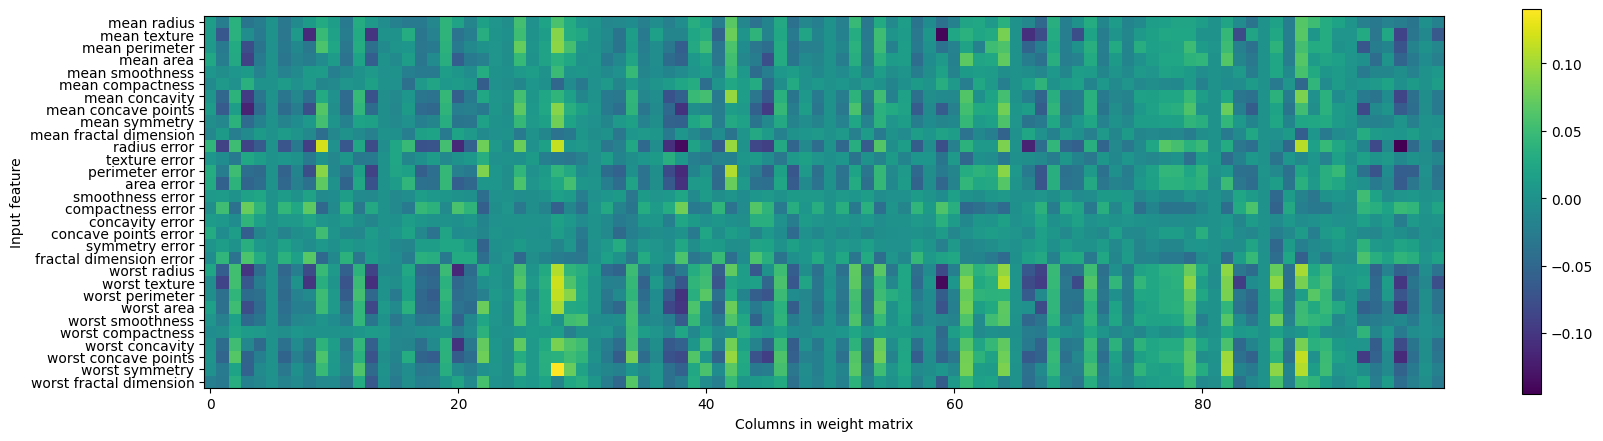

In [34]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()